In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
sns.set()

In [2]:
original=pd.read_csv("1.03. Dummies.csv")
original

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [3]:
working=original.copy()
working["Attendance"]=working["Attendance"].map({"Yes":1,"No":0})
working

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [4]:
y=working["GPA"]
x1=working[["SAT","Attendance"]]
x=sn.add_constant(x1)
result=sn.OLS(y,x).fit()
result.summary()

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           2.19e-15
Time:                        09:54:54   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

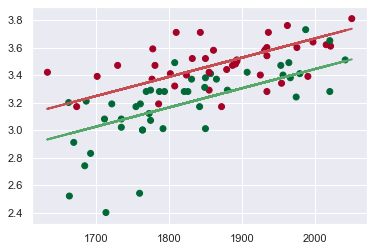

In [9]:
yhat_yes= 0.8665+0.0014*working["SAT"]
yhat_no = 0.6439+0.0014*working["SAT"]
plt.scatter(working["SAT"],y,c=working["Attendance"],cmap="RdYlGn_r")
fig=plt.plot(working["SAT"],yhat_yes,lw="2",c="r")
fig=plt.plot(working["SAT"],yhat_no,lw="2",c="g")
plt.show( )

In [10]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [18]:
predf=pd.DataFrame({"const":1,"SAT":[1700,1670],"attendance":[0,1]})
predf=predf[["const","SAT","attendance"]]
predf=predf.rename(index={0:"bob",1:"alice"})
predf

,const,SAT,attendance
bob,1,1700,0
alice,1,1670,1


In [21]:
answer=result.predict(predf)
answer
postdf=pd.DataFrame({"predicted GPA:- ":answer})
newdf=predf.join(postdf)
newdf

,const,SAT,attendance,predicted GPA:-
bob,1,1700,0,3.023513
alice,1,1670,1,3.204163
